# Marketing Ad Campaign A/B Testing

In [1]:
# Import libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Import dataset
data = pd.read_csv('marketing.csv')

In [3]:
# Check first 5 rows of the dataset
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
# Drop the first column as it is unecessary
data = data.drop(columns = "Unnamed: 0")

In [5]:
# Check data types
data.dtypes

user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [6]:
# Check for NA and Null values
print(data.isna().sum())
print(data.isnull().sum())

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [7]:
# Rename columns. Replace spaces with underscores
data.columns = data.columns.str.replace(' ', '_')
data.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [8]:
# Check the number of rows and columns of the dataset
data.shape

(588101, 6)

In [9]:
# Check for any duplicates in 'user_id'
data['user_id'].nunique()

588101

In [10]:
# Get statistics on the numeric columns
data.describe()

,user_id,total_ads,most_ads_hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [11]:
# Replace 'True' and 'False' to 1 and 0 in a new column
data['converted_int'] = data['converted'].map({True: 1, False: 0})

In [12]:
data.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


# EDA

ad     564577
psa     23524
Name: test_group, dtype: int64


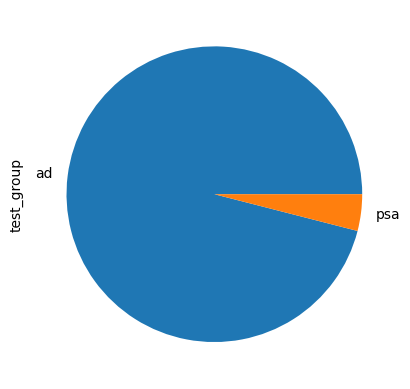

In [13]:
# Number of people for each test group
print(data['test_group'].value_counts())

data['test_group'].value_counts().plot(kind="pie")
plt.show()

False    573258
True      14843
Name: converted, dtype: int64


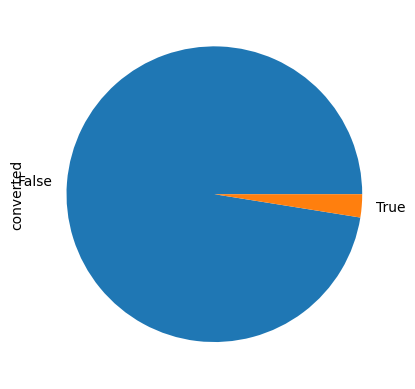

In [14]:
# Value counts of the converted column
print(data['converted'].value_counts())

data['converted'].value_counts().plot(kind="pie")
plt.show()

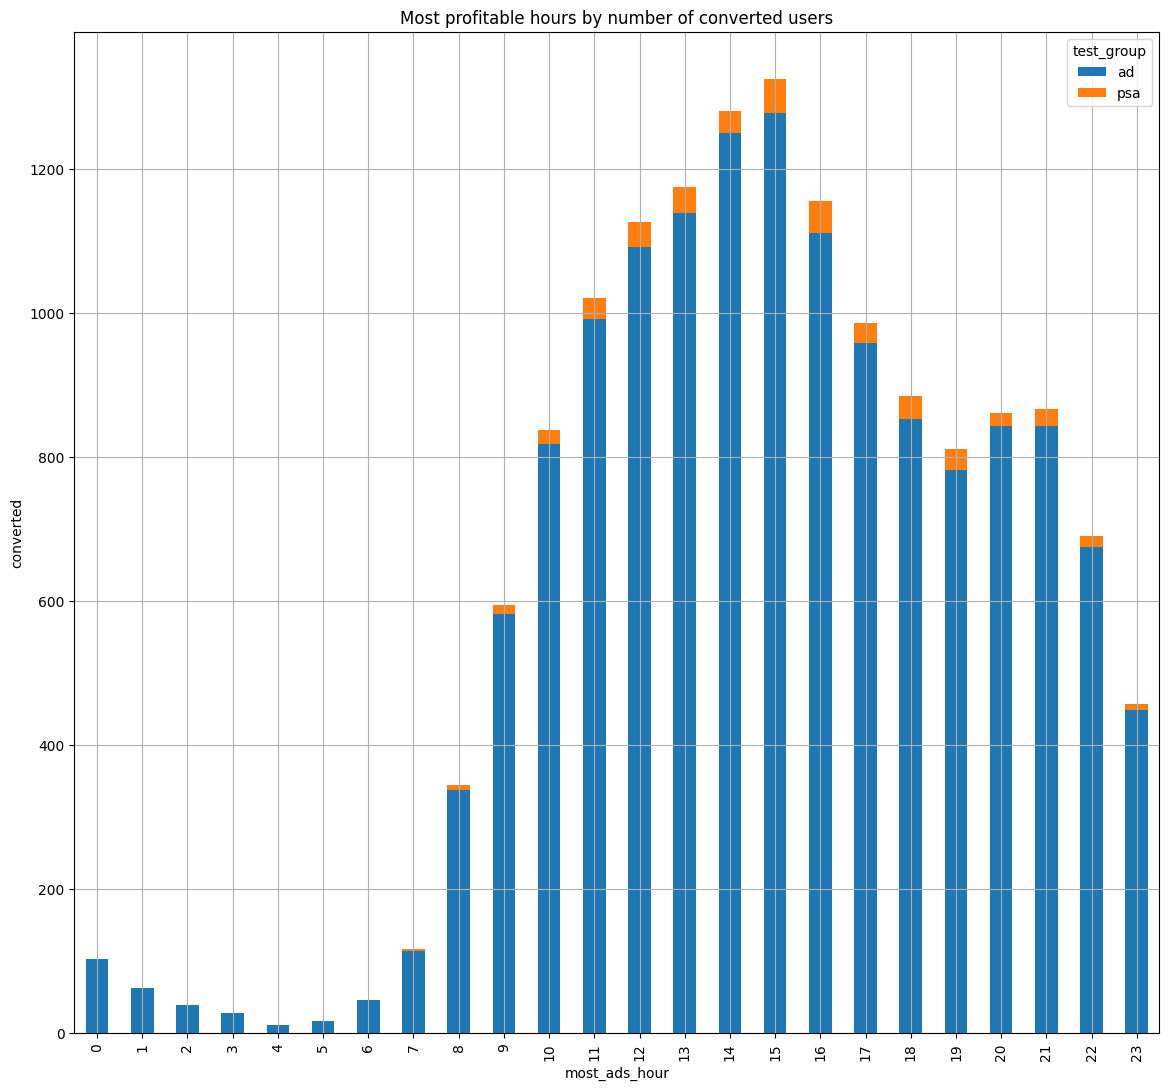

In [15]:
# Most profitable hours by campaign
ax = data.groupby(by =['most_ads_hour', 'test_group'])['converted'].sum().unstack('test_group').plot(kind= 'bar', figsize= (14,13), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most profitable hours by number of converted users')
plt.show()

The most profitable hours were between 1pm and 4pm for both ad and psa campaigns.

<Axes: xlabel='most_ads_hour'>

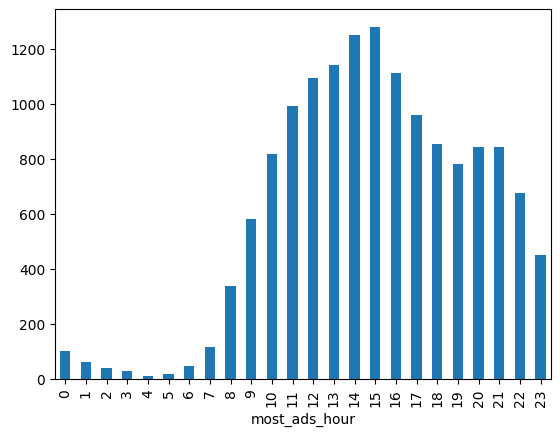

In [16]:
# Most profitable hours for advertisement campaigns
data.loc[data['test_group']=='ad'].groupby('most_ads_hour')['converted'].sum().plot(kind='bar')

The most profitable hours were 2pm and 3pm for advertisements.

<Axes: xlabel='most_ads_hour'>

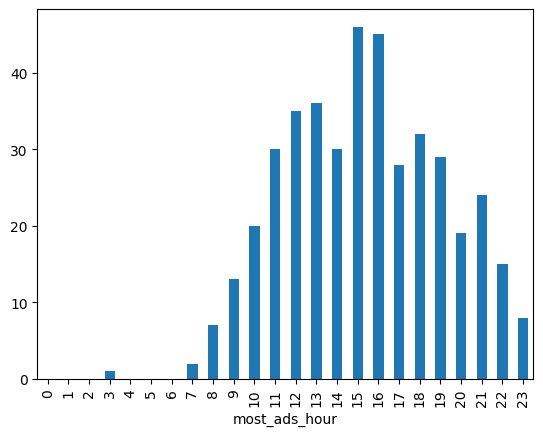

In [17]:
# Most profitable hours for public service announcement campaigns
data.loc[data['test_group']=='psa'].groupby('most_ads_hour')['converted'].sum().plot(kind='bar')

The most profitable hours were 3pm and 4pm for public service announcement.

most_ads_day
Friday       2057
Monday       2857
Saturday     1719
Sunday       2090
Thursday     1790
Tuesday      2312
Wednesday    2018
Name: converted, dtype: int64


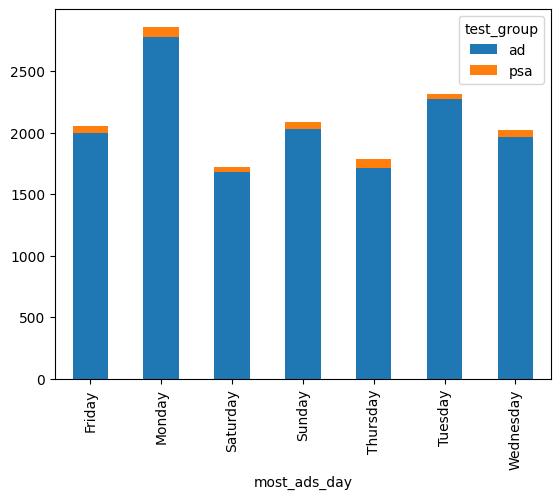

In [18]:
# Most profitable days for 'ad' and 'psa'
print(data.groupby('most_ads_day')['converted'].sum())

data.groupby(by=['most_ads_day', 'test_group']).sum()['converted_int'].unstack('test_group').plot(kind='bar', stacked=True)
plt.show()

The most profitable day were there were most user conversions was on Monday followed by Tuesday.

most_ads_day
Friday       1995
Monday       2778
Saturday     1679
Sunday       2027
Thursday     1711
Tuesday      2270
Wednesday    1963
Name: converted, dtype: int64


<Axes: xlabel='most_ads_day'>

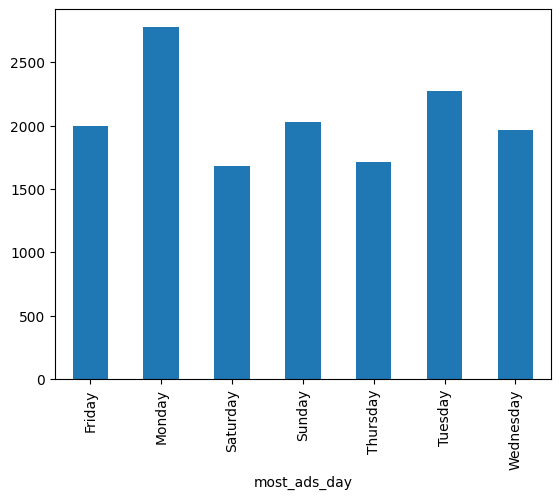

In [19]:
# Most profitable days for advertisement campaigns.
print(data.loc[data['test_group']=='ad'].groupby('most_ads_day')['converted'].sum())

data.loc[data['test_group']=='ad'].groupby('most_ads_day')['converted'].sum().plot(kind='bar')

Monday had the most user conversions who were shown the advertisement.

most_ads_day
Friday       62
Monday       79
Saturday     40
Sunday       63
Thursday     79
Tuesday      42
Wednesday    55
Name: converted, dtype: int64


<Axes: xlabel='most_ads_day'>

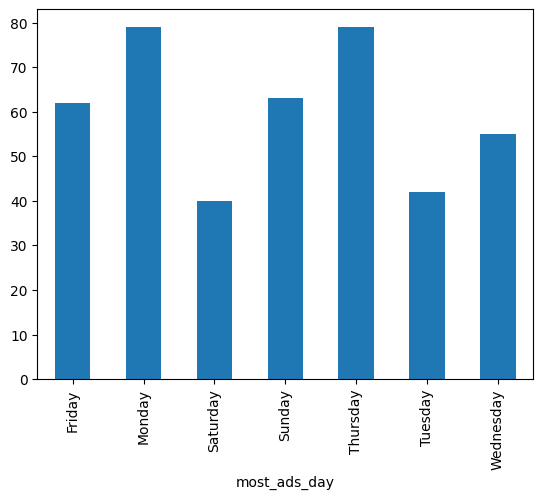

In [20]:
# Most profitable days for public service announcement campaigns.
print(data.loc[data['test_group']=='psa'].groupby('most_ads_day')['converted'].sum())

data.loc[data['test_group']=='psa'].groupby('most_ads_day')['converted'].sum().plot(kind='bar')

Monday and Thursday had the most user conversions who were shown the public service announcement.

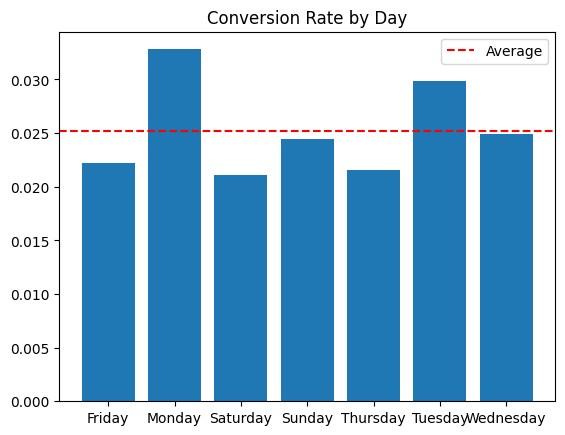

In [21]:
# Conversion Rate by Day
day_conv = pd.DataFrame(data.groupby('most_ads_day')['converted'].mean())
day_conv.reset_index(inplace=True)

plt.figure()
plt.bar(data=day_conv, x='most_ads_day', height='converted')
plt.title('Conversion Rate by Day')
plt.axhline(data['converted'].mean(), color='r', linestyle='--', label='Average')
plt.legend()
plt.show()

Mondays and Thursdays were the most successful days as the conversion rate is above the average.

# A/B Testing

In [22]:
# Calculate conversion rate
converted_users = data[data['converted']==True]['user_id'].nunique()
total_users = data['user_id'].nunique()

conversion_rate = converted_users / total_users
print(conversion_rate)

0.02523886203220195


This conversion rate is 2.52% if the user saw either 'ad' or 'psa'.

In [23]:
# Conversion rate for each test group
ad_group = data[data['test_group'] == 'ad']
psa_group = data[data['test_group'] == 'psa']

conv_rate_ad = ad_group['converted'].mean()
conv_rate_psa = psa_group['converted'].mean()

print(conv_rate_ad)
print(conv_rate_psa)

0.025546559636683747
0.01785410644448223


The conversion rates show that the ad group had a higher conversion rate at 2.55%, whereas the psa group had a conversion rate of 1.79%. This could suggest that the ads were successful and had an impact on users converting.

In [24]:
data_diff = conv_rate_ad - conv_rate_psa
print(data_diff)

0.007692453192201517


**T-test and p value**

In [25]:
ttest = ttest_ind(data[data['test_group'] == 'ad']['converted'], data[data['test_group'] == 'psa']['converted'])
ttest

TtestResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13, df=588099.0)

The p-value is 0.00, which is lower than the significance level of 0.05. This means that we can reject the null hypothesis. There is a significant difference between the two groups.

These results demonstrate that the ad campaign was successful. The difference in conversion rates between the two groups shows that the success could be attributed to the ads.